<a href="https://colab.research.google.com/github/Tarigopula6367/NLP1/blob/main/Diabetes_Prediction_Using_Gaussian_Process_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)


In [16]:
# Load the balanced dataset
df = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Quick check
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [17]:
# Choose features
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Age']

# Set input and output
X = df[features]
y_reg = df['Diabetes_binary']   # For GPR
y_cls = df['Diabetes_binary']   # For GPC


In [18]:
from sklearn.model_selection import train_test_split

# Train-test split (same split for regression and classification)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42, stratify=y_cls
)
_, _, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Gaussian Process Regression (GPR)

In [20]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Define the kernel
kernel = RBF(length_scale=0.5) + WhiteKernel()


In [21]:
# Trying with 5000 rows instead
X_train_small = X_train_scaled[:5000]
y_train_small = y_train_reg[:5000]

# Train again
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(X_train_small, y_train_small)


GaussianProcessRegressor(kernel=RBF(length_scale=0.5) + WhiteKernel(noise_level=1),
                         random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred_reg = gpr.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("GPR - Mean Squared Error (MSE):", mse)
print("GPR - R² Score:", r2)


GPR - Mean Squared Error (MSE): 0.18587615152099807
GPR - R² Score: 0.25649539019683576


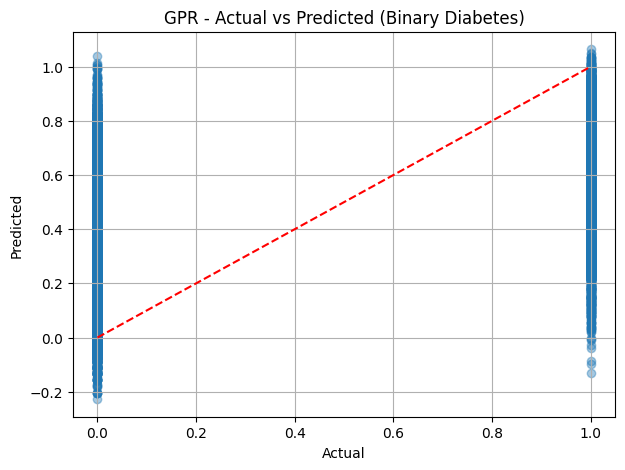

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.4)
plt.plot([0, 1], [0, 1], 'r--')  # Perfect prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("GPR - Actual vs Predicted (Binary Diabetes)")
plt.grid(True)
plt.show()


**GPC Classification**

In [24]:
# Select a smaller sample to avoid memory issues
X_train_small_cls = X_train_scaled[:5000]
y_train_small_cls = y_train_cls[:5000]


In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define kernel
kernel = RBF(length_scale=0.5)

# Create GPC model
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit model
gpc.fit(X_train_small_cls, y_train_small_cls)


GaussianProcessClassifier(kernel=RBF(length_scale=0.5), random_state=42)

In [26]:
# Predict class labels
y_pred_cls = gpc.predict(X_test_scaled)


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy and other metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
conf_mat = confusion_matrix(y_test_cls, y_pred_cls)
report = classification_report(y_test_cls, y_pred_cls)

print("GPC - Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", report)


GPC - Accuracy: 0.7238842916755075

Confusion Matrix:
 [[4731 2339]
 [1565 5504]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      7070
         1.0       0.70      0.78      0.74      7069

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139



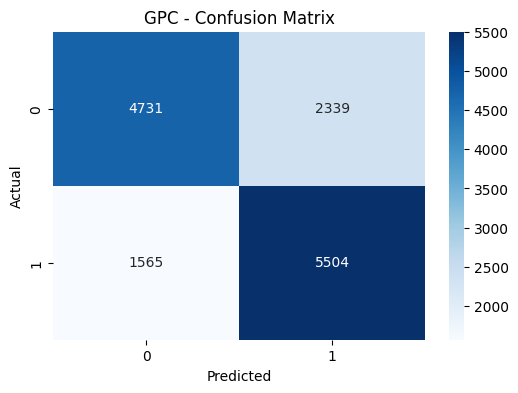

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("GPC - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
